In [1]:
!pip install python-dotenv

In [14]:
import requests
import argparse
import os
from dotenv import load_dotenv
# import fal
from PIL import Image
from io import BytesIO
from IPython.display import display, Image as IPImage
load_dotenv()

True

In [15]:
def save_image(image_data, filename="flower.png"):
    try:
        image = Image.open(BytesIO(image_data))
        image.save(filename, format="PNG")
        print(f"Image saved as {filename}")
        display(IPImage(filename))
    except Exception as e:
        print(f"Error saving image: {e}")


In [6]:
def generate_image(plant_name, api_key):

    url = "https://54285744-illusion-diffusion.gateway.alpha.fal.ai/"
    headers ={
        "Authorization":f"Key {api_key}",
        "Content_Type":"application/json"}
    payload = {
        "image_url": "https://storage.googleapis.com/falserverless/illusion-examples/pattern.png",
        f"prompt": "(masterpiece:1.4), (best quality), (detailed),"+plant_name,
        "negative_prompt": "(worst quality, poor details:1.4), lowres, (artist name, signature, watermark:1.4), bad-artist-anime, bad_prompt_version2, bad-hands-5, ng_deepnegative_v1_75t"}

    response = requests.post(url,headers=headers,json=payload)


    print(f"response.status_code:{response.status_code}")

    if response.status_code == 200:
        illusion_diffusion_output = response.json()
        if "image" in illusion_diffusion_output:
            image_url = illusion_diffusion_output["image"]["url"]
            image_data = requests.get(image_url).content
            save_image(image_data, "generated_image.png")
            return image_data
        else:
            print("No 'image' key in the API response.")
    else:
        print(f"API request failed with status code: {response.status_code}")
        print(response.text)

    return None

In [7]:
def recognize_plant(image_path, api_key):
    url = "https://my-api.plantnet.org/v2/identify/all"
    headers = {}
    payload={"api-key": api_key}
    files = {"images":open("/content/generated_image.png","rb")}

    try:
        response = requests.post(url, headers=headers,params=payload, files=files)
        print(f"recognize_plant response code:{response.status_code}")
        print(response.json)
        return response.json()["results"][0]["species"]["scientificNameWithoutAuthor"]
    except requests.exceptions.HTTPError as errh:
        print(f"HTTP Error: {errh}")
    except requests.exceptions.RequestException as err:
        print(f"Request Exception: {err}")

response.status_code:200
Image saved as generated_image.png


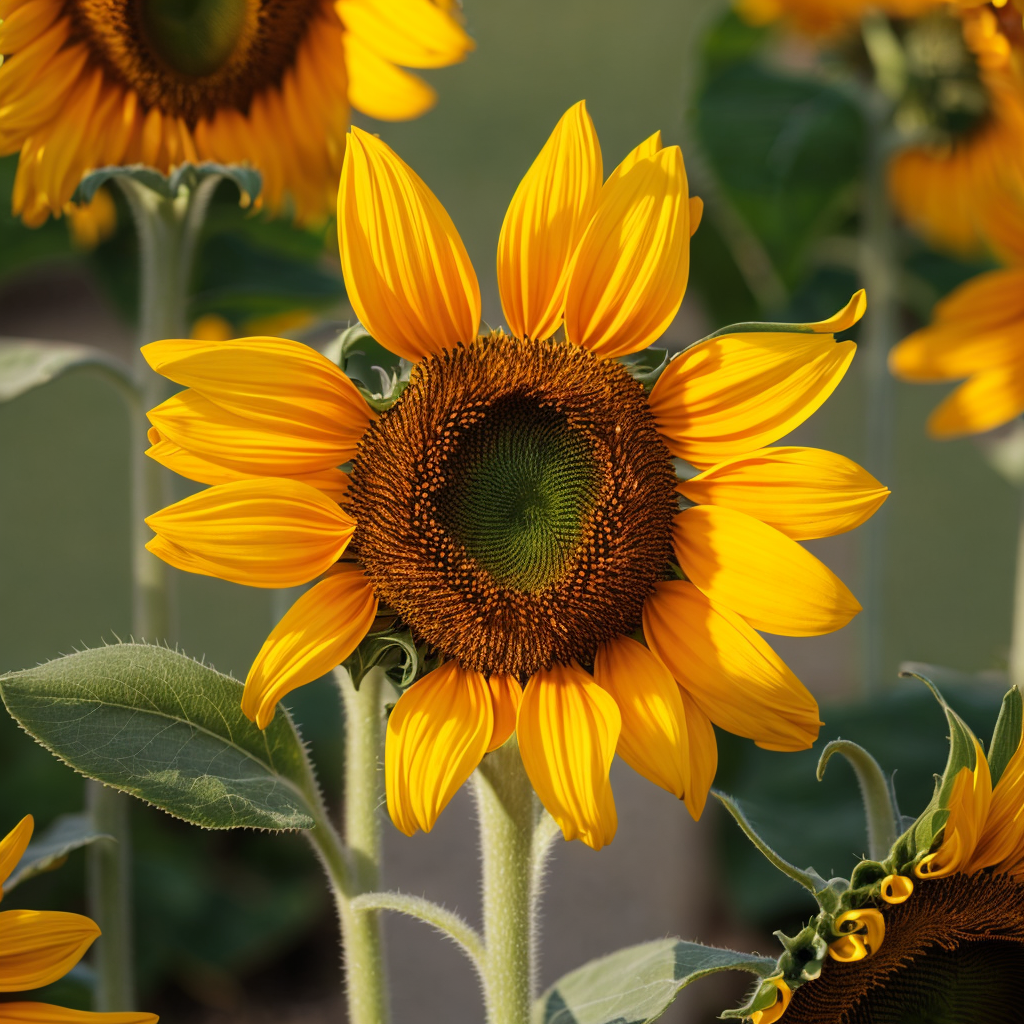

recognize_plant response code:200
<bound method Response.json of <Response [200]>>
The recognized plant is: Helianthus annuus


In [16]:

def main():
    illusion_diffusion_api_key = os.getenv("ILLUSION_DIFFUSION_API_KEY")
    plantnet_api_key = os.getenv("PLANTNET_API_KEY")
    if not illusion_diffusion_api_key or not plantnet_api_key:
        print("Please provide API keys in the .env file.")
        return
    ## you can instead ""
    image_data = generate_image("Sunflower", illusion_diffusion_api_key)

    if image_data:

        plant_name = recognize_plant(image_data, plantnet_api_key)

        if plant_name:
            print(f"The recognized plant is: {plant_name}")
        else:
            print("Plant recognition failed.")
    else:
        print("Image generation failed.")

if __name__ == "__main__":
    main()
